# Titanic Exploratory Data Analysis

 References:
 
 http://www.history.com/this-day-in-history/titanic-sinks
 
 https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic

# 1 Introduction

<p align="justify">The RMS Titanic, one of the largest and most luxurious ocean liners ever built from its time. Spanning about 883 feet from stern to bow, a height of 175 feet, and a massive weight of 46,000 tons, it was made to carry about 3,500 passengers and crew. With its massive build, the ship was thought to be unsinkable. However on April 14, 1912 just before midnight, the ship failed to divert its course from an iceberg, which left at least 5 of its hull compartments ruptured. Due to the shortage of lifeboats, only about 700 passengers survived out of the approximately 2,224 passengers on board. 
</p>

<p align="justify">
This exploratory data analysis is submitted as partial fullfilment of the requirements for Udacity's Data Analyst Nanodegree Program. In this notebook, I shall be going into the step by step process of data analysis, in order to answer some questions regarding the given data. The data to be used in this notebook was provided by Udacity and the description of variables was obtained from Kaggle.
</p>


## 1.1 Data Wrangling

### Imports and Loading the Data 

In [166]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
%matplotlib inline

# Figure Prefix
fig_prefix = '../figures/2015-09-20-as-titanic-explo-lab-' 

In [167]:
# Getting the titanic data
titanic_df = pd.read_csv('../data/titanic_data.csv')

### Some information about the data

In [168]:
# Some information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


>**Analysis: **From here we can see that there are about **891 entries** with a total of **12 columns**. The data types for each column can be observed as well. The variable descriptions as obtained from Kaggle is showed from this text file *[data_descriptions.txt](../data/data_descriptions.txt)*.

In [169]:
# Looking at some entries of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2 Data Cleaning
Looking at the the data,  the values didn't represent well their meaning under the `Pclass`, `Sex`, and `Embarked` columns. And since, I'm going to use the data in visualizing some of the analysis, it is much better to change them here.

### Cleaning the Pclass, Sex, and Embarked Columns
For the `Pclass` column, I would put the respective socio-economic status value for each numeric value *(1= Upper Class, 2 = Middle Class, 3 = Lower Class)*. Meanwhile, for the `Sex` column, I would just capitalize each word of the gender. And finally, for the `Embarked` column, I would put the respective embark locations *(C = Cherbourg; Q = Queenstown; S = Southampton)*.

In [170]:
# Functions to clean data
def clean_pclass(df_col):
    '''Returns the string counterpart of the Pclass'''
    p_class = ["Upper Class", "Middle Class", "Lower Class"]
    return p_class[df_col-1]

def clean_embark(df_col):
    '''Returns the whole name of embarked location'''
    if df_col=='C':
        return 'Cherbourg'
    elif df_col=='Q':
        return 'Queenstown'
    else:
        return 'Southampton'
    
def clean_data(df):
    '''Returns the cleaned data frame'''
    df['Pclass'] = df['Pclass'].apply(clean_pclass)
    df['Sex'] = df['Sex'].apply(str.title)
    df['Embarked'] = df['Embarked'].apply(clean_embark)
    return df

In [171]:
titanic_df = clean_data(titanic_df)

In [172]:
# Looking at the cleaned data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Lower Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton


> **Note: **We can see that the changes have reflected in the data frame but it can be observed that the `Age` and `Cabin` column have some missing values.

### Is there other columns with `NaN` entries?
Upon looking at the data, I observed that some rows have no entries under the Age and Cabin column. Is there other columns with missing values? In order to explore the data even further, I looked at each column and check the number of NaN entries in that column.

#### Counting the `NaN` entries per column

In [173]:
# Counts the number of NaN or null entries in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

> **Analysis: **It can be seen that only the `Age` and `Cabin` column have missing values. Specifically, there are 177 missing entries under the `Age` column, whereas 687 entries are missing under the `Cabin` column.

## 1.3 Filling the Missing Values

Remember that the `Age` and `Cabin` columns have some `NaN` or missing values in some of its rows. Upon reading some online resources, I found out that there are options on how to deal with these rows. 

First option is by dropping the rows that have no entries under the `Age` and `Cabin` column, but after observing that a large number of rows have no entries under the respective columns, it would greatly affect my dataset if I were to drop these rows. Hence my second option, using some information from rows with values under the `Age` and `Cabin` columns, I would predict the missing values of these columns.

### Splitting the Name Column
In filling up the missing age, I could have gotten the median age by sex, and just subtitute this median age for every missing value based on the sex of that row. But, I have observed that the title of names (i.e. Mr, Ms, Master, etc.) could also have something to do with age, especially that the title `Master` seemed to be associated with children. Hence, I decided to use these title, in order to predict or fill the missing age.

Using the `Name` column of the data frame, I would split the passenger's name and add three additional columns: `Title`, `Firstname`, `Surname` for the name's title, first name, and surname, respectively.

In [174]:
# Splitting the surname from the rest of the name
s_surname = titanic_df['Name'].str.split(',', expand=True)

# Splitting the title from the rest of the name
s_title = s_surname[1].str.split('.', expand=True)

# Putting the name sections in series
s_firstname = s_title[1].str.strip()   # Removes the whitespace before the str then assigns to s_firstname
s_title = s_title[0].str.strip()       # Removes the whitespace before the str then assigns to s_title
s_surname = s_surname[0]

# # Editing the column name
s_firstname = s_firstname.rename('Firstname')
s_title = s_title.rename('Title')
s_surname = s_surname.rename('Surname')

In [175]:
# Adding the name sections to the data frame
titanic_df = titanic_df.join([s_title, s_firstname, s_surname])

### Organizing the Title Column

Now that the additional columns have been added, I then would like to look at the different titles that I would be working with. Upon looking at the different titles, I decided to unify some of the titles in order to fill the missing ages according to the passenger's title.

In [176]:
# Looking at the different titles in the Data
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [177]:
# Looking at the different titles with missing ages
titanic_df[titanic_df['Age'].isnull()]['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [178]:
# Function that would unify or organize the title based on the titles with missing ages
def unify_title(df):
    '''
    Returns the respective title
    '''
    if df in ['Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer', 'Mr']:
        return 'Mr'
    elif df in ['Lady', 'the Countess', 'Mrs']:
        return 'Mrs'
    elif df in ['Mme', 'Mlle', 'Ms', 'Miss']:
        return 'Miss'
    else:
        return df

In [179]:
# Adding a new column for the unified title
titanic_df['UniTitle'] = titanic_df['Title'].apply(unify_title)

In [180]:
# Confirming that the columns have been added
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Firstname,Surname,UniTitle
0,1,0,Lower Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr,Owen Harris,Braund,Mr
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,Lower Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss,Laina,Heikkinen,Miss
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs,Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,Lower Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr,William Henry,Allen,Mr


### Filling the Age Column

In filling up the missing ages, I wouldn't want to modify the original data, hence I would make a new column `Filled Age` that would contain all passenger's age. Also, since the mean is greatly affected by outliers in the data set, I created a boxplot of `Ages` by `UniTitle` in order to see if there are presence of outliers.

#### Looking for outliers in the Age of each Unified Title

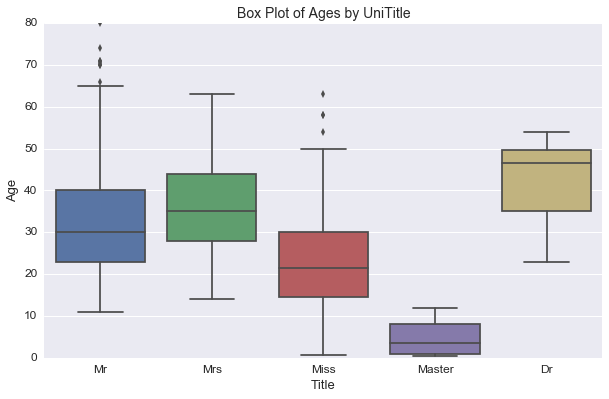

In [181]:
# Plotting the box plot per Unititle
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(x='UniTitle', y='Age', data=titanic_df)

# Plot Customizations
ax.tick_params(labelsize=12)
ax.set_xlabel('Title', fontsize=13)
ax.set_ylabel('Age', fontsize=13)
ax.set_title('Box Plot of Ages by UniTitle', fontsize=14)

fig.savefig(fig_prefix+'box_plot_ages_by_title')

> **Note: **Since there are some outliers, the mean `Age` for the `Titles`: `Mr` and `Miss`, would be affected. Hence, I decided to use the median instead.

#### Creating and filling the Filled Age Column

In [182]:
# Creating a series that contains the median age for each title
median_age_by_title = titanic_df.groupby('UniTitle').median().round(2)['Age']
median_age_by_title

UniTitle
Dr        46.5
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [183]:
# Creating the new column that would contain the complete age data
titanic_df['Filled Age'] = titanic_df['Age']

# Filling the missing ages
# Loop on each row, then look if Filled Age is null then fill by the value in the median_age_by_title
for i in range(len(titanic_df)):
    if np.isnan(titanic_df.loc[i, 'Filled Age']):
        titanic_df.loc[i, 'Filled Age'] = median_age_by_title.loc[titanic_df.loc[i, 'UniTitle']]

In [184]:
# Looking at the filled values
# Just remove .head() to see every missing age and the corresponding filled age
titanic_df[titanic_df['Age'].isnull()][['Age', 'UniTitle', 'Filled Age']].head()  

,Age,UniTitle,Filled Age
5,NaN,Mr,30.0
17,NaN,Mr,30.0
19,NaN,Mrs,35.0
26,NaN,Mr,30.0
28,NaN,Miss,21.5


> **Note: ** We could see that for every NaN values, it have been filled based on the row's UniTitle column.

### Filling the Cabin Column

The `Cabin` column seemed to be missing a lot of values. To be specific, 687 rows have no values under the `Cabin` column. Since there are only about 891 entries/rows in the data frame, almost 77% of the values under the `Cabin` column is missing. Hence, I have decided not to fill this column, and proceed with the analysis part of the data.

# 2 Analysis
In this part, I would go through some analysis wi


In [185]:
# Function used to customize the figures or visualizations
def plot_customize(ax, title=None, xlabel=None, ylabel=None):
    '''This Function customizes the title, xlabel, ylabel of the given axes'''
    ax.tick_params(labelsize=12)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    
    if title!=None:
        ax.set_title(title, fontsize=14)

## 2.1 Data Exploration & Visualization

To start with the exploration, I am going to start off with the basic details that the data has to offer.

## 2.1.1 Looking into the Distribution of Age and Filled Age Column
Since the `Age` Column was missing some values, the `Filled Age` Column was added. And in order to fill in the missing age values, the median for each `UniTitle` was obtained and was used to fill the missing age values. So, what does the distribution looks like before and after filling the missing age values?

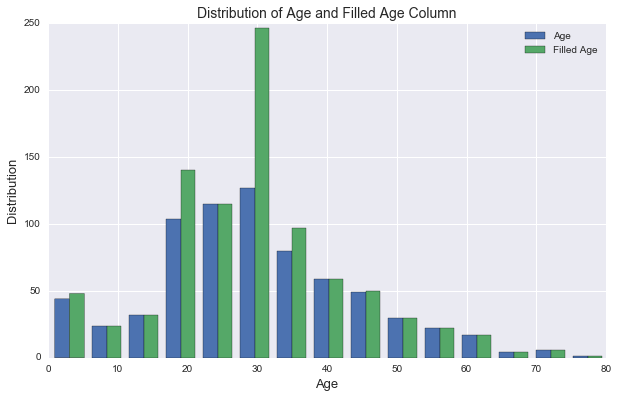

In [186]:
# Visualizing the two distributions
fig = plt.figure(figsize=(10,6))

# Plotting the histogram
plt.hist([titanic_df['Age'].dropna(), titanic_df['Filled Age']], label=['Age','Filled Age'], bins=15)

# Plot Customizations
plt.legend(loc='best')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Distribution', fontsize=13)
plt.title('Distribution of Age and Filled Age Column', fontsize=14)

plt.savefig(fig_prefix+'distribution_age_and_fill_age')

>**Analysis: **Looking at this figure, it seemed that between the `Age` and `Filled Age` Column there is a notable difference at the age bin of around 30. Did most of the `NaN` or null values dropped have `UniTitle` of `Mr`? Specifically, is most of the missing age values are Male?

### Another Look into the Missing Age Values

In [187]:
# Missing Age Values by Gender
print 'Male: %d' % (titanic_df[titanic_df['Age'].isnull()]['Sex']=='Male').sum()   # Number of missing age values from male
print 'Female: %d' % (titanic_df[titanic_df['Age'].isnull()]['Sex']=='Female').sum() # Number of missing age values from female

Male: 124
Female: 53


> **Analysis: **From this, we could see that a large portion of the missing `Age` values are indeed Male, and since the `Title Mr` have been given to the majority of Male passengers, it is understandable that there would be a huge difference at the age bin of 30, which is the median age of `UniTitle Mr`.

## 2.1.2 Looking into Survival
In this part, we shall start looking into the survivability of passengers, and other factors that could affect survivability. But before going deeper, let us answer some basic questions.

### How many passengers survived and did not survived?

In [188]:
# Looking into how many passengers survived and did not survived
grouped_by_survived = titanic_df.groupby(['Survived'], as_index=True).count()['PassengerId']
grouped_by_survived.index = ["Didn't Survived", 'Survived',]
grouped_by_survived

Didn't Survived    549
Survived           342
Name: PassengerId, dtype: int64

>**Analysis: **From here we could see that there are 342 survivors. 

#### Visualizing the Division of Passengers who Survived and Did Not Survived

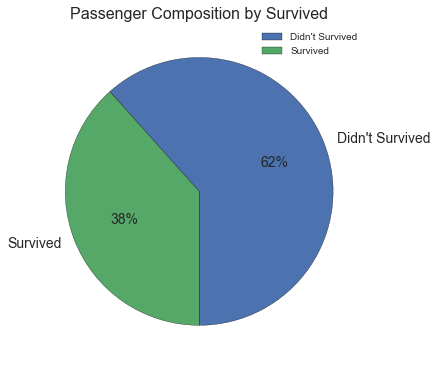

In [189]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# Plotting the passenger composition by gender
grouped_by_survived.plot.pie(subplots=True, fontsize=14, ax=ax, autopct='%.0f%%', startangle=-90)

ax.yaxis.set_visible(False)
ax.set_title('Passenger Composition by Survived', fontsize=16)
ax.legend(loc='best')

fig.savefig(fig_prefix+'passenger_comp_by_survived')

>**Analysis: **It can be observed that only about 38% of the passengers survived. Specifically, only 342 out of the 549 passengers, survived. So, does the 342 passengers that survived have some things in common?

## 2.1.3 Looking into Sex/Gender
Some questions we are looking to answer under this part are:
   - How many of the passengers are male? Female?
   - How many survived from both of these genders? 
   - How many did not survived from both of these genders?
   - Does a passenger's gender affects his/her survivability?

### How many of the passengers are male? Female?

In [190]:
grouped_by_sex = titanic_df.groupby(['Sex'], as_index=True).count()['PassengerId']
grouped_by_sex

Sex
Female    314
Male      577
Name: PassengerId, dtype: int64

>**Analysis: **From here we could see that there are 314 female passengers and 577 male passengers in the data. 

#### Visualizing the Passenger Composition by Gender

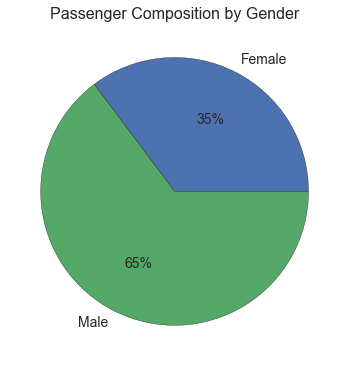

In [191]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# Plotting the passenger composition by gender
grouped_by_sex.plot.pie(subplots=True, fontsize=14, ax=ax, autopct='%.0f%%')

ax.yaxis.set_visible(False)
ax.set_title('Passenger Composition by Gender', fontsize=16)

fig.savefig(fig_prefix+'passenger_comp_by_sex')

>**Analysis: **From the pie graph above, we could see that about 65% of the passengers are male, while other the 35% are female.

### How many Survived and Did Not Survived from each Gender?
We were able to look at the composition of passengers by gender. But, how many from each gender have survived? That didn't survived?

In [192]:
# Creating a dataframe that would summarize the survival rate from each gender
grouped_by_sex_survival = pd.DataFrame(titanic_df.groupby(['Sex', 'Survived'], as_index=True).count()['PassengerId'])
grouped_by_sex_survival.columns = ['Count']
grouped_by_sex_survival.index.set_levels(['Not Survived', 'Survived'], level=1, inplace=True)
grouped_by_sex_survival

Count
Sex    Survived           
Female Not Survived     81
       Survived        233
Male   Not Survived    468
       Survived        109

>**Analysis: **For the female passengers, 233 survived out of the 314 female passengers. Whereas, for the male passengers, only 109 survived out of the 468 male passengers.

#### Visualizing the Survivability by Gender

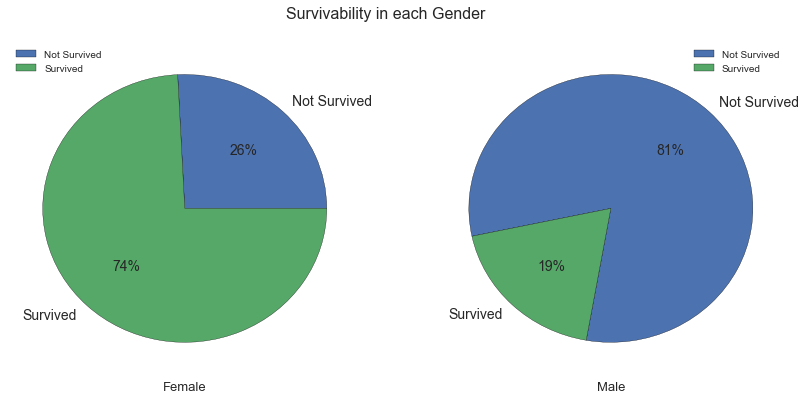

In [193]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plotting
grouped_by_sex_survival.ix['Female'].plot.pie(subplots=True, fontsize=14, ax=ax1, autopct='%.0f%%')
grouped_by_sex_survival.ix['Male'].plot.pie(subplots=True, fontsize=14, ax=ax2, autopct='%.0f%%', startangle=-100)

# Plot Customization
fig.suptitle('Survivability in each Gender', fontsize=16)
plot_customize(ax1, xlabel='Female')
ax1.yaxis.set_visible(False)

plot_customize(ax2, xlabel='Male')
ax2.yaxis.set_visible(False)

fig.savefig(fig_prefix+'pie_survival_each_gender')

>**Analysis: ** Each pie graph shows the survivability from each gender. We could confirm that almost 74% of the female passengers survived, while only 19% of the male passengers survived.

### Does a Passenger's Gender affect his/her Survivability?
From the figures above, it begs to question that: 'Does a passenger's gender has something to with his/her survivability?'

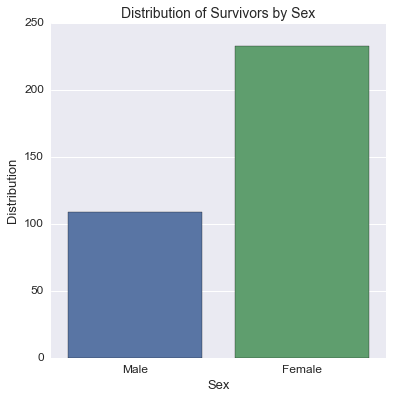

In [194]:
# Looking into survivability by sex
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Sex', y='Survived', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
plot_customize(ax, 'Distribution of Survivors by Sex', 'Sex', 'Distribution', )
fig.savefig(fig_prefix+'dist_survivors_by_sex')

>**Analysis: **From the figure above, we could see that indeed majority of the survivors are female. Even though that only 35% of the passengers are female, majority of the survivors are still female.

## 2.1.4 Looking into the Socio-Economic Status
In the data, there are three classes: Upper Class, Middle Class, and Lower Class. Lets look into the socio-economic status of the passengers. Some questions we are hoping to answer in this part are:
   - How many of the passengers are upper class, middle class, and lower class?
   - How many of the upper class, middle class, and lower class passengers survived?
   - How many of the upper class, middle class, and lower class passengers did not survived?
   - We saw earlier that most of the survivors are female, is it the same across different class?

### How many of the passengers are upper class, middle class, and lower class?

In [195]:
grouped_by_pclass = titanic_df.groupby(['Pclass'], as_index=True).count()['PassengerId']
grouped_by_pclass

Pclass
Lower Class     491
Middle Class    184
Upper Class     216
Name: PassengerId, dtype: int64

>**Analysis: **From here we could see that there are 216 upper class passengers, 184 middle class passengers, and 491 lower class passengers.

#### Visualizing the Passenger Composition by Class

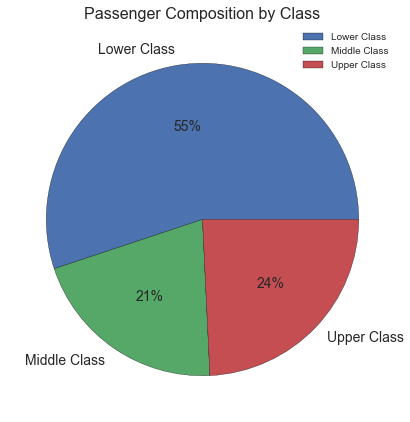

In [196]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

# Plotting the passenger composition by gender
grouped_by_pclass.plot.pie(subplots=True, fontsize=14, ax=ax, autopct='%.0f%%')

ax.yaxis.set_visible(False)
ax.legend(loc='best')
ax.set_title('Passenger Composition by Class', fontsize=16)

fig.savefig(fig_prefix+'passenger_comp_by_pclass')

>**Analysis: **We could see that about 55% of the passengers belong to the lower class, while 24% belong to the upper class, and the remaining 21% belong to the middle class.

### How many Survived and Did Not Survived from each Class?

In [197]:
grouped_by_status_survival = titanic_df.groupby(['Pclass', 'Survived'], as_index=False).count()
grouped_by_status_survival = pd.DataFrame(titanic_df.groupby(['Pclass', 'Survived'], as_index=True).count()['PassengerId'])
grouped_by_status_survival.columns = ['Count']
grouped_by_status_survival.index.set_levels(['Not Survived', 'Survived'], level=1, inplace=True)
grouped_by_status_survival

Count
Pclass       Survived           
Lower Class  Not Survived    372
             Survived        119
Middle Class Not Survived     97
             Survived         87
Upper Class  Not Survived     80
             Survived        136

#### Visualizing the Survivability by Gender

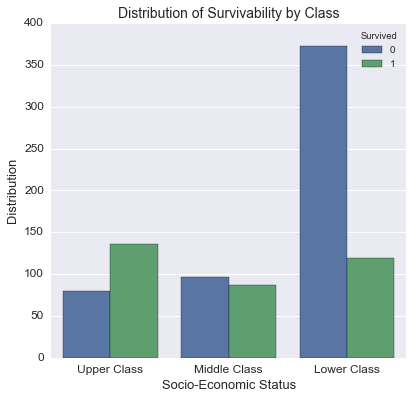

In [198]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)

ax = sns.barplot(x='Pclass', y='Survived', hue='Survived', estimator=lambda x: len(x), data=titanic_df,
                order=['Upper Class', 'Middle Class', 'Lower Class'])

plot_customize(ax, xlabel='Socio-Economic Status', ylabel='Distribution', title='Distribution of Survivability by Class')

fig.savefig(fig_prefix+'dist_survivability_by_pclass')

### Does the Socio-Economic Status of a Person affects his/her Survivability?
Looking at a passenger's socio-economic status and survivability.

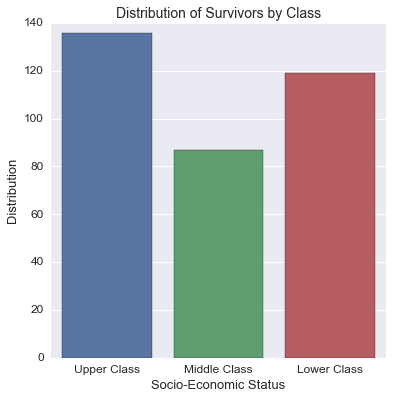

In [199]:
# Looking into survivability by Class
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Pclass', y='Survived', data=titanic_df, estimator=np.sum, ci=0,
                 order=['Upper Class', 'Middle Class', 'Lower Class'])

# Plot Customizations
plot_customize(ax, 'Distribution of Survivors by Class', 'Socio-Economic Status', 'Distribution')
fig.savefig(fig_prefix+'survivors_by_pclass')

> **Analysis: ** From here, we could see that the socio-economic status may also have played a role in a passenger's survivability.

#### A deeper look into the Socio-Economic Status
We looked at the socio-economic status and the survivability of passengers. But how many passengers are there for each socio-economic status?

>**Analysis: **From the above, there are 216 Upper Class, 184 Middle Class, and 491 Lower Class passengers.

### Survivability by Sex in each Class
Using the two graphs before, let's look at the survivability by gender in each class.

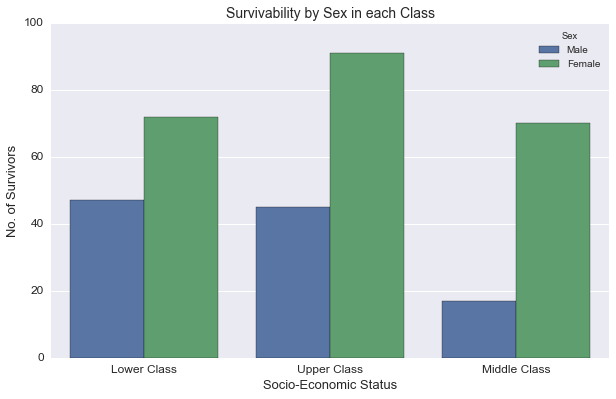

In [200]:
# Looking into survivability by Class
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
plot_customize(ax, 'Survivability by Sex in each Class', 'Socio-Economic Status', 'No. of Survivors')
fig.savefig(fig_prefix+'survivability_by_sex_and_class')

> **Note:** Using the two graphs before, it is not surprising that for each of the class, the number of female survivors are greater than the male survivors; and that the Upper Class had higher survivability compared to the other two classes.

### Survivability by Age

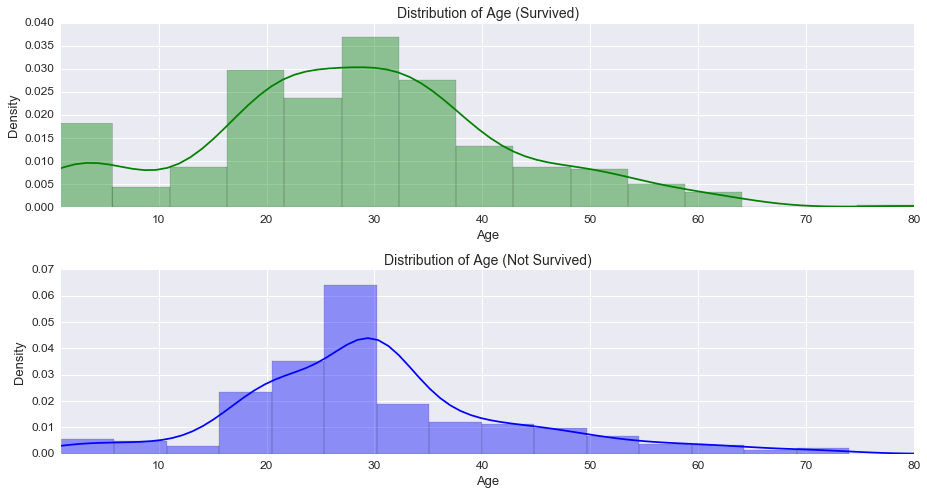

In [201]:
# Looking into the survivability distrubition by age
fig = plt.figure(figsize=(13,7))

# Plotting the distribution
# For Survived
ax1 = fig.add_subplot(211)
ax1= sns.distplot(titanic_df[titanic_df['Survived']==1]['Filled Age'], label="Survived", color='g', bins=15)
plot_customize(ax1, 'Distribution of Age (Survived)', 'Age', 'Density')
ax1.set(xlim=(1,titanic_df['Filled Age'].max()))

# For Not Survived
ax2 = fig.add_subplot(212)
ax2 = sns.distplot(titanic_df[titanic_df['Survived']==0]['Filled Age'], label="Not Survived", color='b', bins=15)
plot_customize(ax2, 'Distribution of Age (Not Survived)', 'Age', 'Density')
ax2.set(xlim=(1,titanic_df['Filled Age'].max()))

plt.tight_layout()

fig.savefig(fig_prefix+'survivability_by_age')

## Rejected Ideas

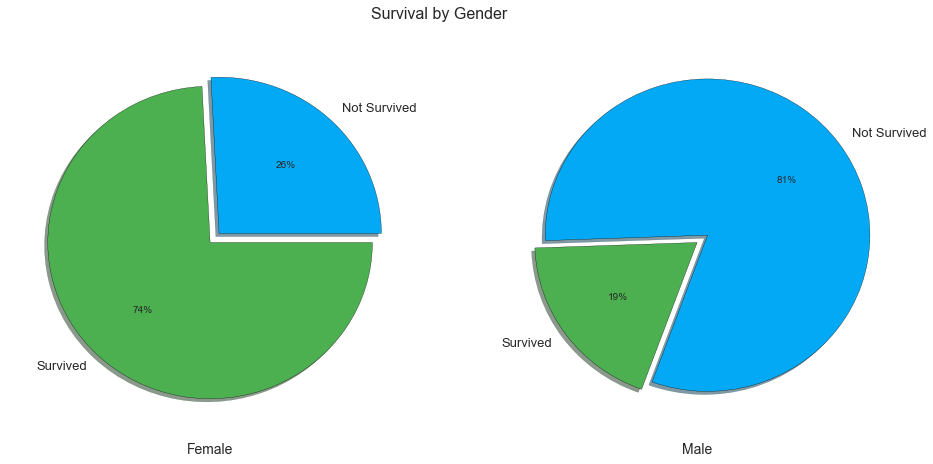

In [202]:
# NOT GONNA USE THIS
# Below is better
labels = ['Not Survived', 'Survived']
colors = ['#03A9F4', '#4CAF50']
explode = (0.08, 0)

fig = plt.figure(figsize=(16,7))
fig.suptitle('Survival by Gender', fontsize=16)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel('Female', fontsize=14)
patches, texts, autotexts = ax1.pie(grouped_by_sex_survival.ix['Female'], labels = labels, autopct='%.0f%%', 
        explode=explode, shadow=True, colors=colors)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)

ax2.set_xlabel('Male', fontsize=14)
patches, texts, autotexts = ax2.pie(grouped_by_sex_survival.ix['Male'], labels = labels, autopct='%.0f%%', 
        explode=explode, shadow=True, colors=colors, startangle=-110)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)

    Scratch: Thinking of just finding the median age by sex and putting the median age on the missing values. BUT! Why not try extracting the title of the name (i.e. Mr., Mrs, etc) and then find the median age based on the sex and the title.
    
    Steps:
    1. Split surname by using , as delimiter
    2. Create a list of titles from the data
    3. Unify these titles

In [203]:
a=None
print a==None

True


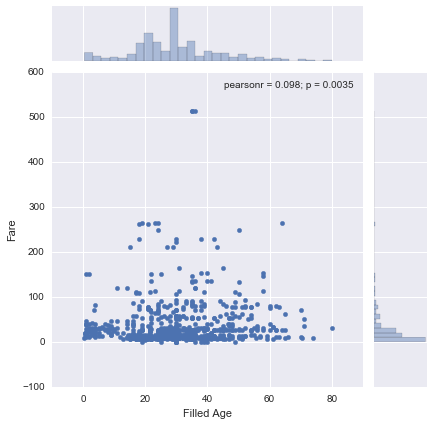

In [204]:
sns.jointplot(x='Filled Age', y='Fare', data=titanic_df)